In [3]:
import requests
import pandas as pd
import json
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import numpy as np
import matplotlib.gridspec as gridspec

In [4]:
plt.rcParams.update({'font.size': 22})

# Connect to Strava API

See tutorial [here](https://medium.com/swlh/using-python-to-connect-to-stravas-api-and-analyse-your-activities-dummies-guide-5f49727aac86).

In [2]:
# Get the tokens from file to connect to Strava
with open('strava_tokens.json') as json_file:
    strava_tokens = json.load(json_file)

In [3]:
# Loop through all activities
url = "https://www.strava.com/api/v3/activities"
access_token = strava_tokens['access_token']

In [16]:
# Get first page of activities from Strava with all fields
#page = 1
df_ls = []
for page in range(1,4):
    r = requests.get(url + '?access_token=' + access_token + '&per_page=200' + '&page=' + str(page))
    r = r.json()
    if (not r):
        break
        
    df = pd.json_normalize(r)
    df_ls.append(df)

In [33]:
df_all = pd.concat(df_ls)
df_all['time'] = pd.to_datetime(df_all['start_date'])
df_all['year'] = df_all['time'].apply(lambda x: x.year)
df_all.tail()

,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,workout_type,id,external_id,...,athlete.id,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,average_watts,kilojoules,device_watts,time,year
195,2,Cospunder See with Eli,10796.5,2848,2870,10.9,InlineSkate,NaN,2786410944,2019-10-13_17-08-21_df102235-8a48-4b07-a78a-56...,...,14902540,1,a2786410944,wv~wHkgkjAp@BtARTE`@Mp@]VIZDTLXDh@b@RFNNJFD?BB...,2,NaN,NaN,NaN,2019-10-13 14:09:03+00:00,2019
196,2,Brocken up,11832.0,12074,15116,910.9,Hike,NaN,2786411738,2019-10-13_17-08-27_fe9b45bf-8ccd-41f7-b580-76...,...,14902540,1,a2786411738,qsq{Hgqe`AVa@XSrBbAvAdD`@l@|@tB`@n@rBrBNj@hAbA...,2,NaN,NaN,NaN,2019-10-12 07:31:27+00:00,2019
197,2,Evening Run,2631.5,806,835,17.9,Run,0.0,2786411421,2019-10-13_17-08-30_796f1cce-ce4b-4f79-b5eb-a5...,...,14902540,1,a2786411421,}aixHoprjAID]KgAk@m@c@m@Y_@Ka@S?ET]Wl@ONIE[i@_...,2,NaN,NaN,NaN,2019-10-11 17:12:17+00:00,2019
198,2,Lunch Run,2487.9,692,1028,10.0,Run,0.0,2786411625,2019-10-13_17-08-34_4e69667f-bc5b-4ada-8c58-a5...,...,14902540,1,a2786411625,utgxHe}ujAIh@Uz@Kh@]|COp@KdAATBLERKNOBIFq@dA_A...,2,NaN,NaN,NaN,2019-10-11 09:53:14+00:00,2019
199,2,Evening Run,2628.0,791,824,13.9,Run,0.0,2786412259,2019-10-13_17-08-44_def90862-e206-4cc9-9acb-86...,...,14902540,1,a2786412259,_bixH{prjA?REFCAo@WwAc@[EWMo@Oo@[SEk@Wk@s@MSK[...,2,NaN,NaN,NaN,2019-10-09 18:04:31+00:00,2019


In [18]:
df_all.to_csv('strava_activities_all_fields.csv')

# Analyse Strava data

In [5]:
df_all = pd.read_csv('strava_activities_all_fields.csv', index_col=0)
df_all['time'] = pd.to_datetime(df_all['start_date'])
df_all['year'] = df_all['time'].apply(lambda x: x.year)
df_all.head()

,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,workout_type,id,external_id,...,athlete.id,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,average_watts,kilojoules,device_watts,time,year
0,2,Lunch Run with Meda,8976.4,2855,3087,51.9,Run,0.0,4519760415,2020-12-26_13-45-29_9703ea82-8a92-458f-a8b6-71...,...,14902540,1,a4519760415,wpfxHc|zjABi@Hs@`A_DrCwOj@wBTeAXy@\iBXqBl@kCLu...,2,NaN,NaN,NaN,2020-12-26 10:28:07+00:00,2020
1,2,Lunch Ride,3920.8,557,578,19.1,Ride,10.0,4519663527,2020-12-26_13-28-11_38298027-5914-401b-b95d-8e...,...,14902540,1,a4519663527,qckxHuuojABWZkATkAL_ADk@?eAMkFEyDLyDRwAfB_GbAi...,2,155.3,86.5,False,2020-12-24 10:01:16+00:00,2020
2,2,Morning Ride,4153.7,652,783,4.0,Ride,10.0,4519663384,2020-12-26_13-28-09_1952da62-1df0-44d6-9199-69...,...,14902540,1,a4519663384,ougxHk~ujA{@|E_@|Ck@hDYv@S^oB~CiAnBENEP?PBh@Zh...,2,124.8,81.4,False,2020-12-24 09:36:10+00:00,2020
3,2,Evening Ride,2576.9,395,429,13.0,Ride,10.0,4519663839,2020-12-26_13-28-14_73cc2cf1-55e7-4624-a6bd-d8...,...,14902540,1,a4519663839,_bixHyorjACBGb@CBC?iAm@aBk@{Ao@KGIOMe@COBOfAuB...,2,139.9,55.3,False,2020-12-22 18:29:37+00:00,2020
4,2,Lunch Ride,2664.2,403,423,0.0,Ride,10.0,4519664143,2020-12-26_13-28-17_04945ff6-7b3e-4e55-ac02-09...,...,14902540,1,a4519664143,avgxHi~ujAg@|CK`AYtAc@|CMd@e@fAaD~FW\GPEf@b@hD...,2,109.3,44.1,False,2020-12-22 10:16:57+00:00,2020


In [ ]:
https://www.strava.com/bikes/7608040

In [14]:
df_all_sel['gear_id'].unique()

array(['b4964426', 'b4693441', 'b7476635', 'b7608040', 'b7722862'],
      dtype=object)

In [15]:
mask = (df_all['type'] == 'Ride') & (df_all['year'] == 2020) 
df_all_sel = df_all[mask]
df_all_sel = df_all_sel.set_index('time')
df_all_sel['week'] = df_all_sel.index.isocalendar().week
df_all_sel = df_all_sel.sort_index()
df_all_sel.loc[:,'distance'] = df_all_sel['distance']/1000.
df_all_sel.loc[:,'average_speed'] = df_all_sel['average_speed']*3.6
df_all_sel.loc[:,'gear_id'] = df_all_sel['gear_id'].replace(df_all_sel['gear_id'].unique(), 
                                                      ['Favorit (32 mm)','Road (23 mm)',
                                                       "Eliska's (40 mm)",'Trutno Trails (2.35")', 
                                                       'Road TT (23 mm)'])
mask = (df_all_sel['commute'] == True)
df_all_com = df_all_sel[mask] # commutes only

df_all_sel['cum_dist'] = df_all_sel['distance'].cumsum()
df_all_com['cum_dist'] = df_all_com['distance'].cumsum()

df_all_sel.head()

/projekt2/hochatm/akuchar/.conda/envs/moje/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,workout_type,id,external_id,...,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,average_watts,kilojoules,device_watts,year,week,cum_dist
time,,,,,,,,,,,,,,,,,,,,,
2020-01-02 10:03:41+00:00,2,Lunch Ride,3.0135,389,434,0.0,Ride,10.0,2982425323,2020-01-04_21-33-54_08d4a410-5635-4234-8682-65...,...,1,a2982425323,mugxH_~ujAi@jDAb@Il@YdB{AjF}@fB_DlF_CzEk@t@OEG...,2,175.2,68.1,False,2020,1,3.0135
2020-01-02 19:01:35+00:00,2,Evening Ride,2.6692,465,480,21.3,Ride,10.0,2982425263,2020-01-04_21-33-52_97cdc98d-4742-414b-8844-b1...,...,1,a2982425263,qaixHaqrjAACAZEPADIByAk@u@]{B{@]Og@]m@y@_@a@Ag...,2,129.6,60.3,False,2020,1,5.6827
2020-01-03 10:12:42+00:00,2,Lunch Ride,2.3977,419,437,3.1,Ride,10.0,2982425120,2020-01-04_21-33-47_cdaa6070-c560-47b3-97f4-4d...,...,1,a2982425120,_vgxHs~ujAy@bGWnCGZ?DB@ARYxAWv@cCjE{@bB}AdCaB|...,2,122.6,51.4,False,2020,1,8.0804
2020-01-03 18:39:37+00:00,2,Evening Ride,2.6303,451,451,17.1,Ride,10.0,2982425208,2020-01-04_21-33-50_70296a7f-f049-4f25-bf54-53...,...,1,a2982425208,oaixHqprjAAEC^ENMFOC{@YsEyB[SY[eAaBAYbD{HT[lC_...,2,119.8,54.0,False,2020,1,10.7107
2020-01-14 11:06:52+00:00,2,Lunch Ride,2.4559,461,461,3.1,Ride,10.0,3073383578,2020-02-05_10-51-31_91980b6b-0b96-453b-8909-1b...,...,1,a3073383578,ovgxHs_vjAYnC]vBKdAUxA@XDNKv@G`@Yr@iArBgAbBiAj...,2,89.4,41.2,False,2020,3,13.1666


## Average speed comparison

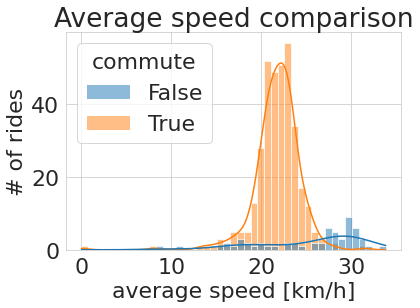

In [8]:
sns.set_style('whitegrid')
sns.histplot(data=df_all_sel, x="average_speed", hue="commute", kde=True, legend = True)
plt.xlabel('average speed [km/h]')
plt.ylabel('# of rides')
plt.title('Average speed comparison')
plt.savefig('speed_hist_cycling_2020.png', bbox_inches='tight', dpi = 300)

# Bike ridden

/projekt2/hochatm/akuchar/.conda/envs/moje/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/projekt2/hochatm/akuchar/.conda/envs/moje/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


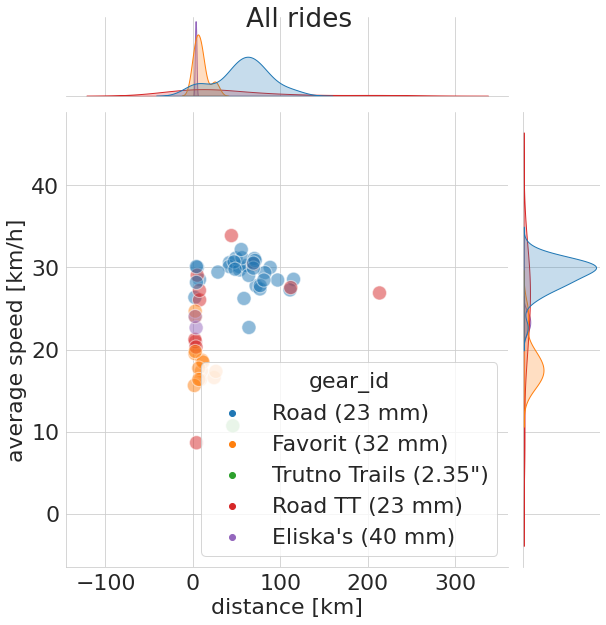

In [16]:
sns.set_style('whitegrid')
g = sns.jointplot(
    data=df_all_sel[df_all_sel['commute'] == False], height = 9,
    x="distance", y="average_speed", hue="gear_id", 
    kind="scatter", legend = True,
    joint_kws = dict(s = 200, alpha = 0.5)
)
#plt.legend(loc = 'lower right')
#g.fig.get_axes()[0].legend(loc='lower left')
#plt.legend(['Road TT (23 mm)',"Eliska's (40 mm)",'Road (23 mm)','Favorit (32 mm)'], 
#           loc='lower left', title = 'bike ridden')
g.fig.suptitle('All rides')
g.set_axis_labels("distance [km]","average speed [km/h]")
#plt.savefig('all_scatter_plot_cycling_2020.png', bbox_inches='tight', dpi = 300)
#g.set_ylabel()
#g.set_xlabel()
#g.add_legend(bbox_to_anchor=(1.05, 0), loc=2, borderaxespad=0.)

In [8]:
df_all_com.gear_id.unique()

array(['Favorit', 'Road', 'Eliscino', 'Road TT'], dtype=object)

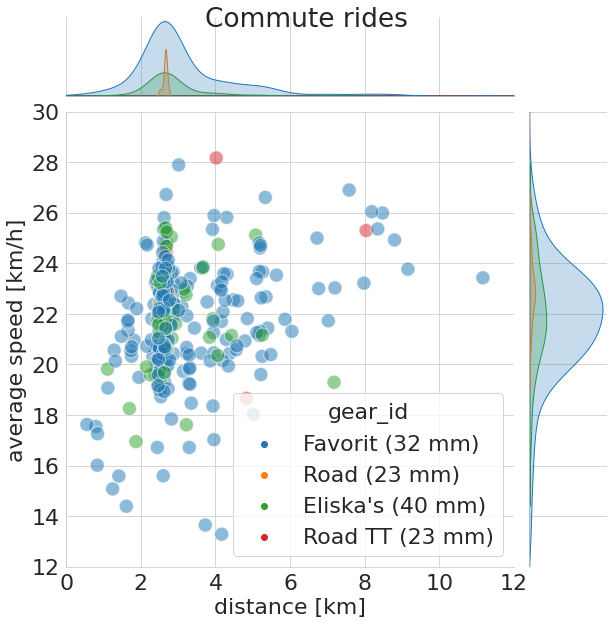

In [18]:
sns.set_style('whitegrid')
g = sns.jointplot(
    data=df_all_com, height = 9,
    x="distance", y="average_speed", hue="gear_id", 
    kind="scatter", xlim = (0,12), ylim = (12,30), legend = True,
    joint_kws = dict(s = 200, alpha = 0.5)
)
#plt.legend(loc = 'lower right')
#g.fig.get_axes()[0].legend(loc='lower left')
#plt.legend(['Road TT (23 mm)',"Eliska's (40 mm)",'Road (23 mm)','Favorit (32 mm)'], 
#           loc='lower left', title = 'bike ridden')
#plt.title('Commute rides')
g.fig.suptitle("Commute rides")#, size=16)
g.set_axis_labels("distance [km]","average speed [km/h]")
#plt.savefig('commute_scatter_plot_cycling_2020.png', bbox_inches='tight', dpi = 300)


## Weather

Use `python OGIMET_synop_parser.py` from [mosplayground](https://github.com/retostauffer/mosplayground).

In [248]:
cnx = sqlite3.connect('./obs_sqlite3/obs_10469.sqlite3')

df_wx = pd.read_sql_query("SELECT * FROM obs", cnx)
df_wx['time'] = pd.to_datetime(df_wx['datumsec'],unit='s',origin='unix')
df_wx = df_wx.set_index('time')
df_wx = df_wx.sort_index()
df_wx.head()

,datumsec,t,td,tmax,tmin,dd,ff,ffx,psta,pmsl,...,viskm,ww,w1,w2,rr1,rr3,rr6,rr12,rr24,snow
time,,,,,,,,,,,,,,,,,,,,,
2019-11-30 23:00:00,1575154800,-0.4,-1.1,NaN,NaN,270.0,7.2,14.4,1007.4,1024.6,...,15.0,0,2.0,2.0,-0.1,-0.1,0.0,-0.1,-0.1,NaN
2019-12-01 00:00:00,1575158400,-0.2,-0.9,NaN,NaN,247.5,7.2,10.8,1007.3,1024.5,...,15.0,0,2.0,2.0,-0.1,-0.1,-0.1,-0.1,-0.1,NaN
2019-12-01 01:00:00,1575162000,0.5,-0.4,NaN,NaN,247.5,7.2,10.8,1007.2,1024.3,...,18.0,0,2.0,2.0,-0.1,-0.1,-0.1,-0.1,-0.1,NaN
2019-12-01 02:00:00,1575165600,0.6,-0.2,NaN,NaN,225.0,7.2,10.8,1006.8,1023.9,...,18.0,0,2.0,2.0,-0.1,0.0,-0.1,-0.1,-0.1,NaN
2019-12-01 03:00:00,1575169200,-0.4,-0.8,NaN,NaN,180.0,3.6,7.2,1006.6,1023.8,...,10.0,0,2.0,2.0,-0.1,-0.1,-0.1,-0.1,-0.1,NaN


In [479]:
indices = [df_wx.index.get_loc(i, method = 'nearest') for i in df_all_com.loc[:'2020-12'].index]
df_wx_sel = df_wx.iloc[indices]
df_wx_sel.loc[:,'week'] = df_wx_sel.index.isocalendar().week

indices = [df_wx.index.get_loc(i, method = 'nearest') for i in df_all_sel.loc[:'2020-12'].index]
df_wx_sel2 = df_wx.iloc[indices]
df_wx_sel2.loc[:,'week'] = df_wx_sel2.index.isocalendar().week

#df_wx_sel.head()

/projekt2/hochatm/akuchar/.conda/envs/moje/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/projekt2/hochatm/akuchar/.conda/envs/moje/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


### Temperature distribution

<AxesSubplot:ylabel='Frequency'>

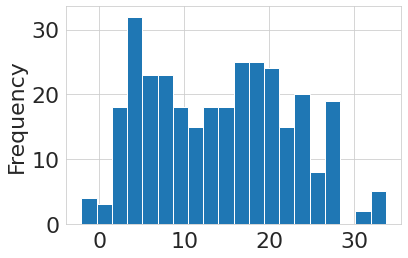

In [212]:
df_wx_sel['t'].plot.hist(bins = 20)

### Cycling budget with weather

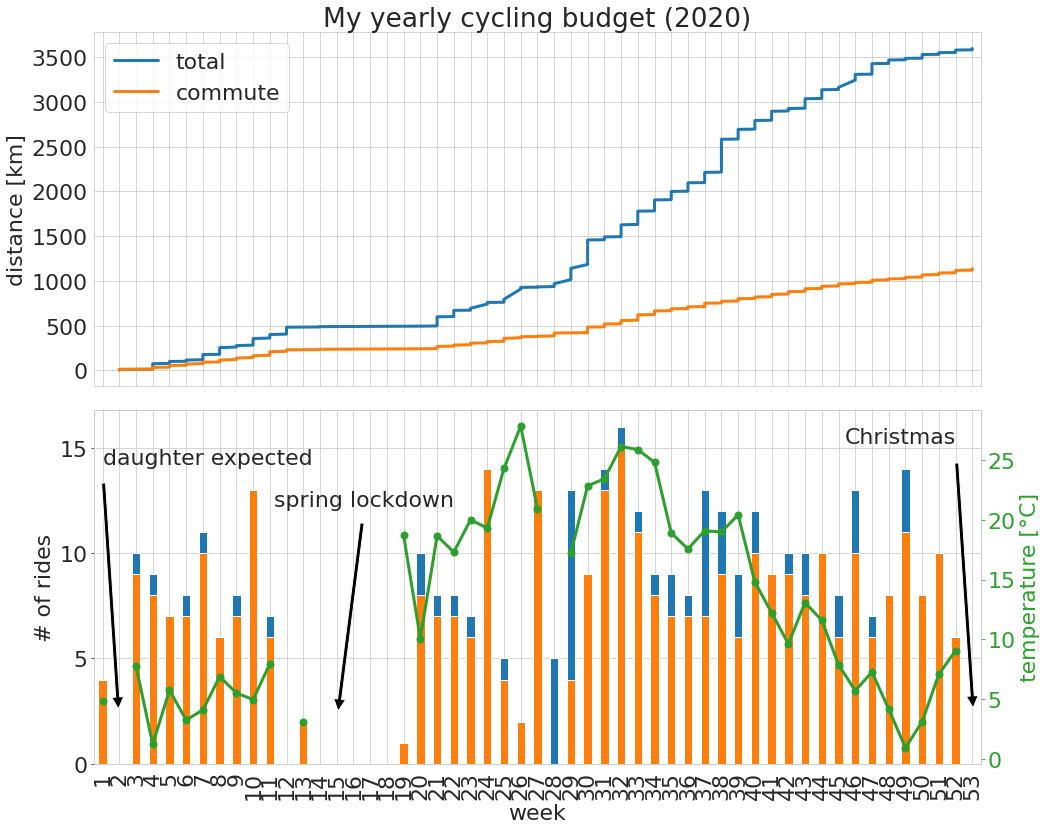

In [473]:
fig = plt.figure(tight_layout=True, figsize = (15,12)) # , 
gs = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)

ax = fig.add_subplot(gs[0, 0])
ax.set_title('My yearly cycling budget (2020)')
ax.set_ylabel('distance [km]')
df_all_sel[['cum_dist','week']].plot(x = 'week', y = 'cum_dist', label = 'total', lw = 3, ax = ax)
df_all_com[['cum_dist','week']].plot(x = 'week', y = 'cum_dist', label = 'commute', lw = 3, ax = ax)

ax = fig.add_subplot(gs[1, 0], sharex=ax)
nw_arr = np.arange(1,54) # array of weeks in 
df_all_sel.groupby('week').count().reindex(nw_arr)['commute'].plot(kind = 'bar', ax = ax, 
                                                                   legend = False) # label = 'total',
df_all_com.groupby('week').count().reindex(nw_arr)['commute'].plot(kind = 'bar', ax = ax, 
                                                                   color = 'C1', # label = 'commute' 
                                                                   legend = False)
#ax.legend()
ax.annotate('spring lockdown', xy=(14, 2),  xycoords='data',
            xytext=(21, 13), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

ax.annotate('Christmas', xy=(52.1, 2),  xycoords='data',
            xytext=(51, 16), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

ax.annotate('daughter expected', xy=(1, 2),  xycoords='data',
            xytext=(0, 15), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top',
            )
ax.set_ylabel('# of rides')
ax.set_yticks(range(0,20,5))
ax2 = ax.twinx()
#ax2.set_yticks(range(0,30,5))
ax2.set_ylabel('temperature [°C]')
ax2.yaxis.label.set_color('C2')
ax2.tick_params(axis='y', colors='C2')
#df_wx_sel['t'].plot(style="ko", ax = ax2)
#df_wx_sel['t'].groupby(by=[df_wx_sel.index.isocalendar().week]).mean().reindex(np.arange(1,53)).plot(style="ko", ax = ax)
temp = df_wx_sel.groupby('week')['t'].mean().reset_index()
temp = temp.rename(columns={'t': 'temperature [°C]'})
temp['week'] = temp['week']-1
temp = temp.set_index('week').reindex(nw_arr-1)
#temp.plot(style="ko", ax = ax2, markersize = 10)
temp.plot(ax = ax2, style = 'C2o-', lw = 3, markersize = 7, legend = False)
ax2.grid(None)

"""ax = fig.add_subplot(gs[0, 1])
df_wx_sel.groupby('w1').count()['t'].plot(kind = 'bar', ax = ax)
labels = {"Sky clear"     : 0,
              "Broken"        : 1,
              "Overcast"      : 2,
              "Fog"           : 4,
              "Drizzle"       : 5,
              "Rain"          : 6,
              "Snow"          : 7,
              "Snow shower"   : 7,
              "Rain shower"   : 8,
              "Thunderstorm"  : 9}
ax.set_xticks(np.arange(10))
ax.set_xticklabels(labels.keys(), rotation =90)
ax.set_xlabel('')
ax.set_xlabel('# of rides')


#ax = fig.add_subplot(gs[0, 1])
g = sns.jointplot(
    data=df_all_com, 
    x="distance", y="average_speed", hue="gear_id", 
    kind="scatter", xlim = (0,12), ylim = (12,30), legend = False,
    joint_kws = dict(s = 200, alpha = 0.5), ax = ax)
plt.legend(['Road TT (23 mm)',"Eliska's bike(40 mm)",'Road (23 mm)','Favorit (32 mm)'], loc='lower left')

mg4 = SeabornFig2Grid(g, fig, gs[1,1])"""
plt.savefig('week_dependendence_cycling_2020.png', bbox_inches='tight', dpi = 300)
#g.set_axis_labels("distance [km]","average speed [km/h]")

### Weather histogram

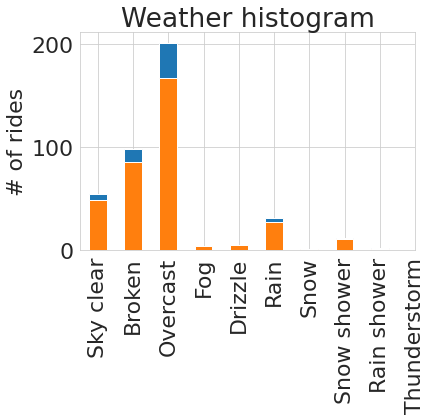

In [500]:
df_wx_sel2.groupby('w1').count()['t'].plot(kind = 'bar')
df_wx_sel.groupby('w1').count()['t'].plot(kind = 'bar', color = 'C1')

labels = {"Sky clear"     : 0,
              "Broken"        : 1,
              "Overcast"      : 2,
              "Fog"           : 4,
              "Drizzle"       : 5,
              "Rain"          : 6,
              "Snow"          : 7,
              "Snow shower"   : 7,
              "Rain shower"   : 8,
              "Thunderstorm"  : 9}
plt.xticks(np.arange(10),labels = labels.keys(), rotation =90)
plt.ylabel('# of rides')
plt.xlabel('')
plt.title('Weather histogram')
plt.savefig('wx_histogram_cycling_2020.png', bbox_inches='tight', dpi = 300)

<AxesSubplot:ylabel='Frequency'>

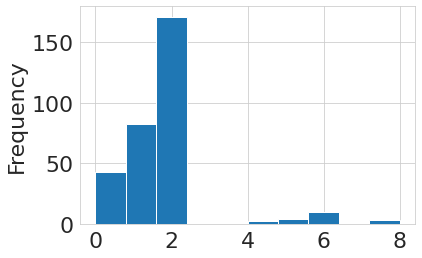

In [223]:
df_wx_sel['w2'].plot.hist()